## 1. Gravitational 2-Body Problem

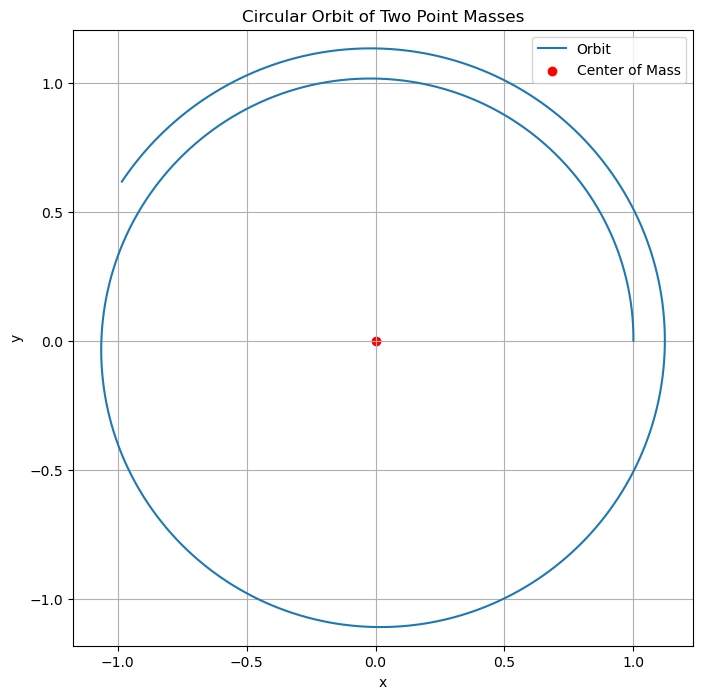

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
delta_tau = 0.01
total_time = 10.0
num_steps = int(total_time / delta_tau)

# Initial conditions
s0 = np.array([1.0, 0.0])  # Initial position vector
w0 = np.array([0.0, 1.0])  # Initial velocity vector

s = np.zeros((num_steps, 2))
w = np.zeros((num_steps, 2))

s[0] = s0
w[0] = w0

# Forward Euler integration
for i in range(1, num_steps):
    # Update position
    s[i] = s[i-1] + delta_tau * w[i-1]

    # Update velocity
    s_magnitude = np.linalg.norm(s[i-1])
    w[i] = w[i-1] - delta_tau * s[i-1] / (s_magnitude ** 3)

# Plot the result
plt.figure(figsize=(8, 8))
plt.plot(s[:, 0], s[:, 1], label='Orbit')
plt.scatter([0], [0], color='red', label='Center of Mass')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circular Orbit of Two Point Masses')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [4]:
def compute_lrl_vector(s, w):
    L = np.cross(s, w)  # Specific angular momentum (scalar in 2D)
    A_x = w[1] * L - s[0] / np.linalg.norm(s)
    A_y = -w[0] * L - s[1] / np.linalg.norm(s)
    A = np.array([A_x, A_y])
    return A

def compute_eccentricity(s, w):
    A = compute_lrl_vector(s, w)
    e = np.linalg.norm(A)
    return e

s0 = np.array([1.0, 0.0])  # Initial position vector
w0 = np.array([0.0, 1.0])  # Initial velocity vector

# Compute the eccentricity
eccentricity = compute_eccentricity(s0, w0)

print(f"The eccentricity of the orbit is: {eccentricity}")


The eccentricity of the orbit is: 0.0


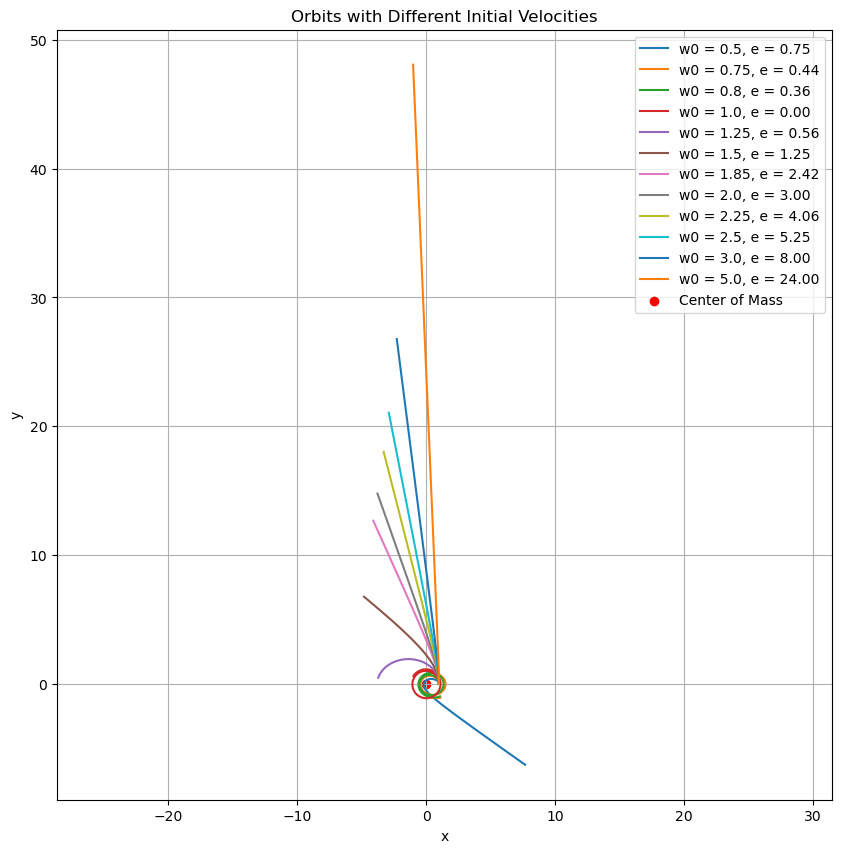

In [7]:
delta_tau = 0.01
total_time = 10.0
num_steps = int(total_time / delta_tau)

s0 = np.array([1.0, 0.0])  # Initial position vector
w0_values = [0.5, 0.75, 0.8, 1.0, 1.25, 1.5, 1.85, 2.0, 2.25, 2.5, 3.0, 5.0]  # Different initial velocity values

def compute_lrl_vector(s, w):
    L = np.cross(s, w)  # Specific angular momentum (scalar in 2D)
    A_x = w[1] * L - s[0] / np.linalg.norm(s)
    A_y = -w[0] * L - s[1] / np.linalg.norm(s)
    A = np.array([A_x, A_y])
    return A

def compute_eccentricity(s, w):
    A = compute_lrl_vector(s, w)
    e = np.linalg.norm(A)
    return e

def integrate_orbit(s0, w0, delta_tau, num_steps):
    s = np.zeros((num_steps, 2))
    w = np.zeros((num_steps, 2))
    s[0] = s0
    w[0] = w0

    for i in range(1, num_steps):
        s[i] = s[i-1] + delta_tau * w[i-1]
        s_magnitude = np.linalg.norm(s[i-1])
        w[i] = w[i-1] - delta_tau * s[i-1] / (s_magnitude ** 3)

    return s

# Plot the results for different initial velocities
plt.figure(figsize=(10, 10))
for w0 in w0_values:
    w0_vec = np.array([0.0, w0])
    s = integrate_orbit(s0, w0_vec, delta_tau, num_steps)
    eccentricity = compute_eccentricity(s0, w0_vec)
    plt.plot(s[:, 0], s[:, 1], label=f'w0 = {w0}, e = {eccentricity:.2f}')

plt.scatter([0], [0], color='red', label='Center of Mass')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits with Different Initial Velocities')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


5. If the initial velocity $\omega_0$ exceeds $\sqrt{2} \omega_0$, the total mechanical energy of the system becomes positive, which means the orbit will no longer be bound. In such cases, the two bodies will follow a hyperbolic trajectory, and they will not remain in a closed orbit around each other. We have some of those examples in the plot above as well.

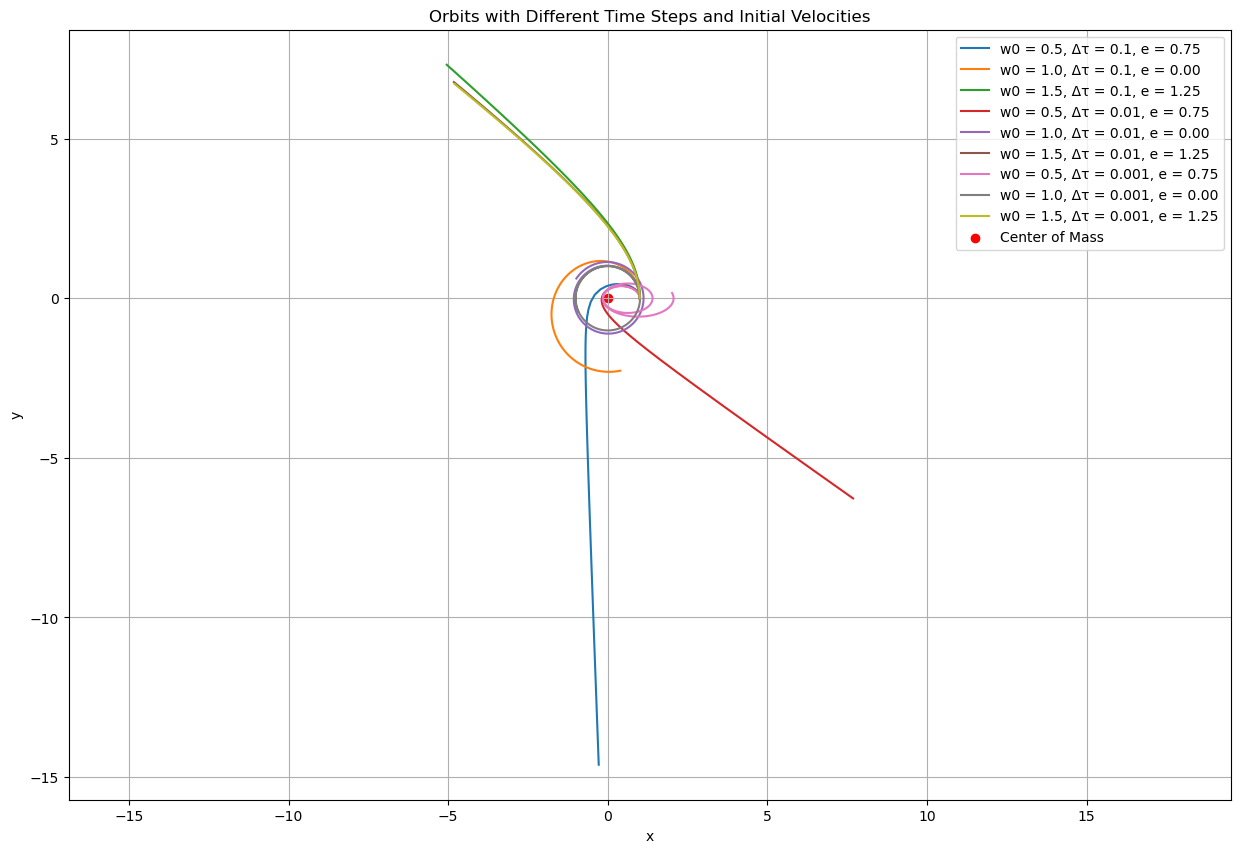

In [8]:
delta_tau_values = [0.1, 0.01, 0.001]  # Different time steps
total_time = 10.0

s0 = np.array([1.0, 0.0])  # Initial position vector
w0_values = [0.5, 1.0, 1.5]  # Different initial velocity values

def compute_lrl_vector(s, w):
    L = np.cross(s, w)  # Specific angular momentum (scalar in 2D)
    A_x = w[1] * L - s[0] / np.linalg.norm(s)
    A_y = -w[0] * L - s[1] / np.linalg.norm(s)
    A = np.array([A_x, A_y])
    return A

def compute_eccentricity(s, w):
    A = compute_lrl_vector(s, w)
    e = np.linalg.norm(A)
    return e

def integrate_orbit(s0, w0, delta_tau, total_time):
    num_steps = int(total_time / delta_tau)
    s = np.zeros((num_steps, 2))
    w = np.zeros((num_steps, 2))
    s[0] = s0
    w[0] = w0

    for i in range(1, num_steps):
        s[i] = s[i-1] + delta_tau * w[i-1]
        s_magnitude = np.linalg.norm(s[i-1])
        w[i] = w[i-1] - delta_tau * s[i-1] / (s_magnitude ** 3)

    return s

plt.figure(figsize=(15, 10))
for delta_tau in delta_tau_values:
    num_steps = int(total_time / delta_tau)
    for w0 in w0_values:
        w0_vec = np.array([0.0, w0])
        s = integrate_orbit(s0, w0_vec, delta_tau, total_time)
        eccentricity = compute_eccentricity(s0, w0_vec)
        plt.plot(s[:, 0], s[:, 1], label=f'w0 = {w0}, Δτ = {delta_tau}, e = {eccentricity:.2f}')

plt.scatter([0], [0], color='red', label='Center of Mass')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits with Different Time Steps and Initial Velocities')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


6. As the time step decreases, the numerical integration becomes more accurate, and the orbits closely resemble the true analytical solutions. The computed eccentricity remain relatively constant for a given initial velocity, regardless of the time step, as it is a conserved quantity. Orbits close more or less for elliptical ones when the time-step is small and the integration is accurate.

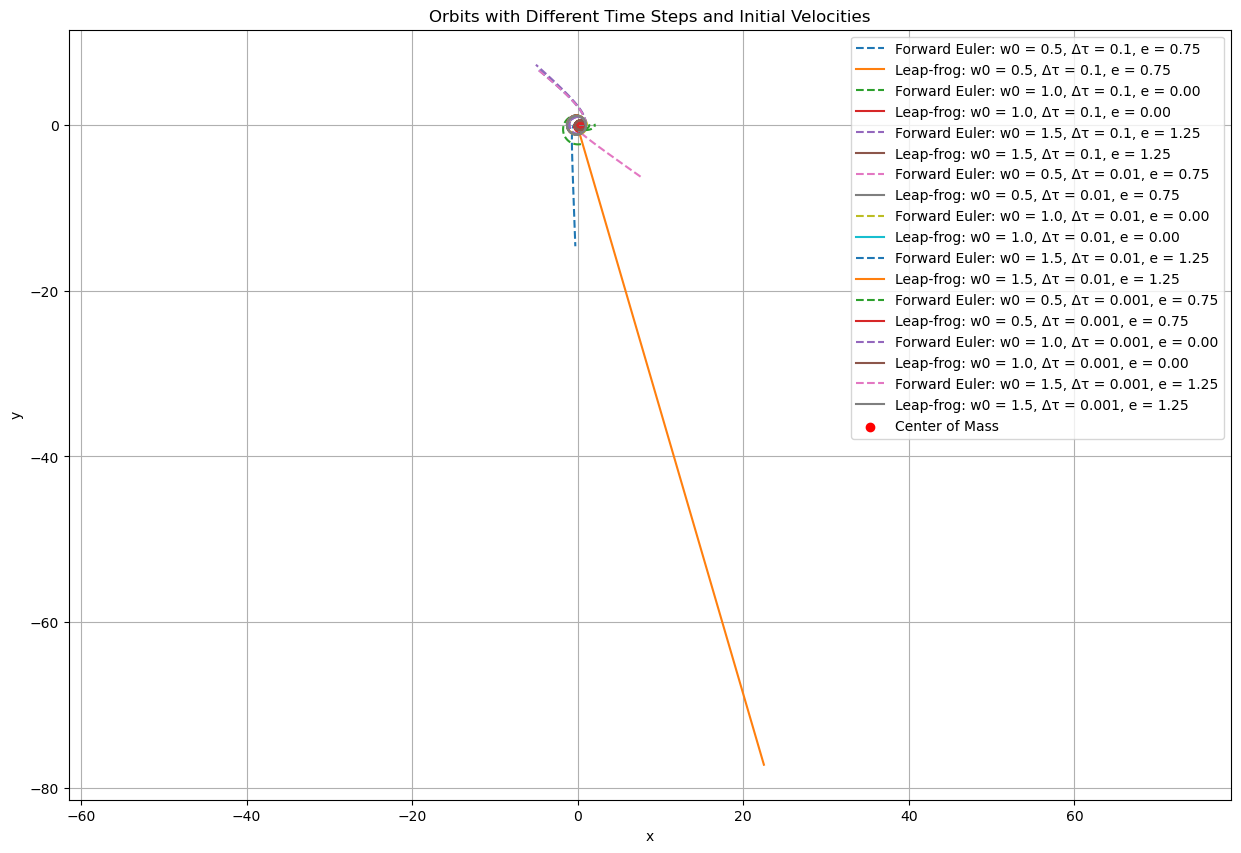

In [9]:
delta_tau_values = [0.1, 0.01, 0.001]
total_time = 10.0

s0 = np.array([1.0, 0.0])  # Initial position vector
w0_values = [0.5, 1.0, 1.5]  # Different initial velocity values

def compute_lrl_vector(s, w):
    L = np.cross(s, w)  # Specific angular momentum (scalar in 2D)
    A_x = w[1] * L - s[0] / np.linalg.norm(s)
    A_y = -w[0] * L - s[1] / np.linalg.norm(s)
    A = np.array([A_x, A_y])
    return A

def compute_eccentricity(s, w):
    A = compute_lrl_vector(s, w)
    e = np.linalg.norm(A)
    return e

def integrate_orbit_forward_euler(s0, w0, delta_tau, total_time):
    num_steps = int(total_time / delta_tau)
    s = np.zeros((num_steps, 2))
    w = np.zeros((num_steps, 2))
    s[0] = s0
    w[0] = w0

    for i in range(1, num_steps):
        s[i] = s[i-1] + delta_tau * w[i-1]
        s_magnitude = np.linalg.norm(s[i-1])
        w[i] = w[i-1] - delta_tau * s[i-1] / (s_magnitude ** 3)

    return s

def integrate_orbit_leap_frog(s0, w0, delta_tau, total_time):
    num_steps = int(total_time / delta_tau)
    s = np.zeros((num_steps, 2))
    w = np.zeros((num_steps, 2))
    s[0] = s0
    w[0] = w0

    # Half-step velocity update
    s_magnitude = np.linalg.norm(s[0])
    w_half = w[0] - 0.5 * delta_tau * s[0] / (s_magnitude ** 3)

    for i in range(1, num_steps):
        s[i] = s[i-1] + delta_tau * w_half
        s_magnitude = np.linalg.norm(s[i])
        w[i] = w_half - delta_tau * s[i] / (s_magnitude ** 3)
        w_half = w[i] - delta_tau * s[i] / (s_magnitude ** 3)

    return s

plt.figure(figsize=(15, 10))
for delta_tau in delta_tau_values:
    num_steps = int(total_time / delta_tau)
    for w0 in w0_values:
        w0_vec = np.array([0.0, w0])

        # Forward Euler
        s_euler = integrate_orbit_forward_euler(s0, w0_vec, delta_tau, total_time)
        eccentricity_euler = compute_eccentricity(s0, w0_vec)
        plt.plot(s_euler[:, 0], s_euler[:, 1], '--', label=f'Forward Euler: w0 = {w0}, Δτ = {delta_tau}, e = {eccentricity_euler:.2f}')

        # Leap-frog
        s_leap_frog = integrate_orbit_leap_frog(s0, w0_vec, delta_tau, total_time)
        eccentricity_leap_frog = compute_eccentricity(s0, w0_vec)
        plt.plot(s_leap_frog[:, 0], s_leap_frog[:, 1], '-', label=f'Leap-frog: w0 = {w0}, Δτ = {delta_tau}, e = {eccentricity_leap_frog:.2f}')

plt.scatter([0], [0], color='red', label='Center of Mass')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits with Different Time Steps and Initial Velocities')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


## 2. Error Analysis